<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h2>پیام کیانی افشار - 96440156</h2><br>
</div>
<div style="direction:rtl !important; font-family: B Yekan;text-align:center">
     تمرین تکلیف کامپیوتری شماره یک در اینجا با استفاده از کتابخانه ها و بعضی هم با پیاده سازی شخصی انجام شده است.
</div>


<div style=" !important; font-family: B Yekan; font-weight:bold">
    <h3>Wave:</h3>
</div>
<div style="direction:rtl !important; font-family: B Yekan;text-align:center">
   کتابخانه ای در پایتون میباشد که نیازی به نصب ندارد و برای خواندن و نوشتن فایل ها با فرمت wave استفاده میشود.جایگزینی هم برای این کتابخانه وجود دارد که زیرمجموعه scypi است
</div>

<div style=" !important; font-family: B Yekan; font-weight:bold">
    <h3>Fast DTW:</h3>
</div>
<div style=" font-family: B Yekan;text-align:center">
   <a href="https://pypi.org/project/fastdtw/">رفتن به سایت منبع</a> 
</div>
<div style=" !important; font-family: B Yekan; font-weight:bold">
    <h3>Numpy:</h3>
</div>
<div style=" font-family: B Yekan;text-align:center">
   <a href="https://numpy.org/">رفتن به سایت منبع</a> 
</div>
<div style=" !important; font-family: B Yekan; font-weight:bold">
    <h3>Matplotlib:</h3>
</div>
<div style=" font-family: B Yekan;text-align:center">
   <a href="https://matplotlib.org/">رفتن به سایت منبع</a> 
</div>
<div style=" !important; font-family: B Yekan; font-weight:bold">
    <h3>Librosa:</h3>
</div>
<div style=" font-family: B Yekan;text-align:center">
   <a href="https://librosa.org/doc/latest/index.html">رفتن به سایت منبع</a> 
</div>
<div style=" !important; font-family: B Yekan; font-weight:bold">
    <h3>Spafe:</h3>
</div>
<div style=" font-family: B Yekan;text-align:center">
   <a href="https://spafe.readthedocs.io/en/latest/">رفتن به سایت منبع</a> 
</div>


In [1]:
import wave
import matplotlib.pyplot as plt
import numpy as np
import wave
from scipy.spatial.distance import euclidean
import scipy.signal as signal_func
from fastdtw import fastdtw
from sklearn import preprocessing
import librosa as lib
import math
from spafe.features.lpc import lpc, lpcc
import pandas as pd

<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h2>مشاهده فایل های صوتی نام خانوادگی</h2><br>
</div>
<div style="direction:rtl !important; font-family: B Yekan; justify:center">
    در اینجا فایل های صوتی را بااستفاده از کتابخانه wave برای خواندن باز میکنیم و دیتا را به صورت یک ارایه نگهداری میکنیم سپس با استفاده از کتابخانه matplot آنها را نشان میدهیم. 
    تمام فایل های نام خانوادگی درون لیستی از چندین لیست به نام lastnames ذخیره میشوند.
</div>

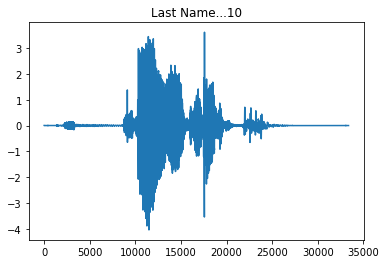

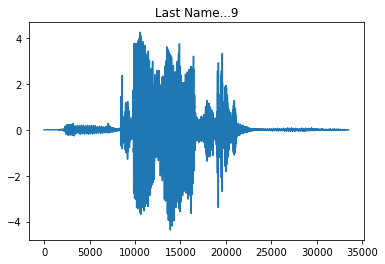

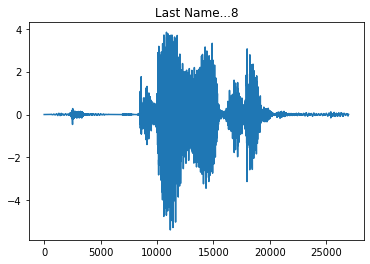

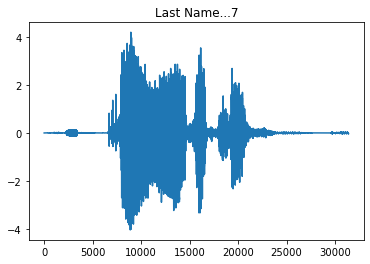

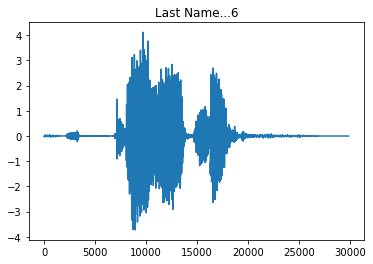

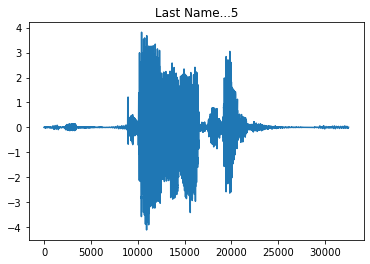

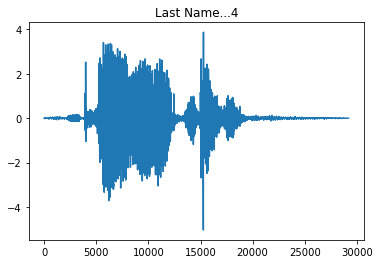

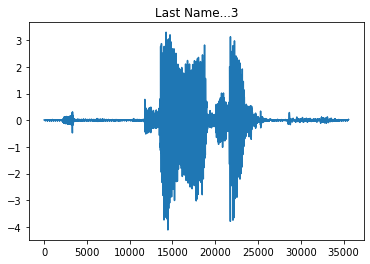

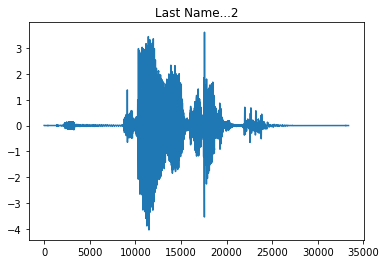

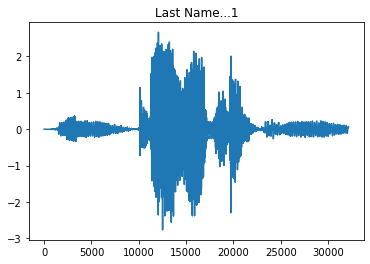

In [2]:
lastnames = []
i = 1
while i <= 10:
    spf =  wave.open("Lastname/lm ({}).wav".format(i),'rb')
    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.frombuffer(signal, dtype = "int16")
    normalSignal = [float(data / 1000) for data in signal]
    lastnames.append(normalSignal)
    i += 1
i-=2
while i >= 0:
    plt.figure(i)
    plt.title("Last Name...{}".format(i + 1))
    plt.plot(lastnames[i])
    i-= 1

plt.show()

<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h2>نرمال سازی دیتاهای مربوط به نام خانوادگی</h2><br>
</div>
<div style="direction:rtl !important; font-family: B Yekan; justify:center">
    برای نرمال سازی از کتابخانه Librosa استفاده شده است که با سرعت بسیار بالایی داده ها را نرمال سازی میکند. در ادامه تفاوت داده های نرمال سازی شده و اولیه که از فایل صوتی خوانده شدند را مشاهده میکنید.
    <div  style="direction:rtl !important; font-family: B Yekan; font-weight:bold; color:orange">(نرمال سازی شده)</div>
    <div style="direction:rtl !important; font-family: B Yekan; font-weight:bold; color:darkblue">(داده اولیه)</div>
</div>
    

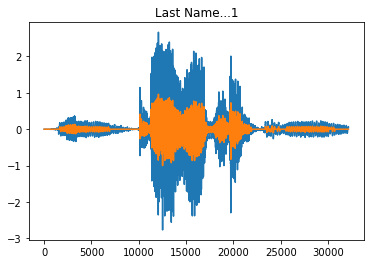

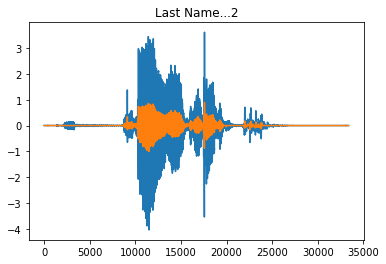

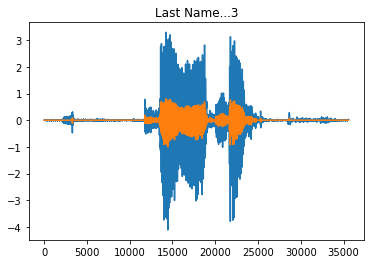

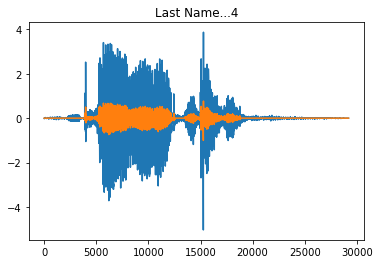

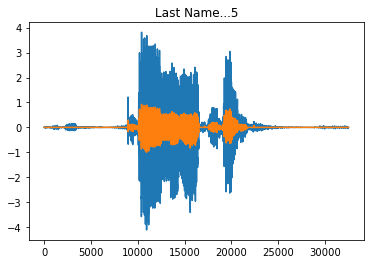

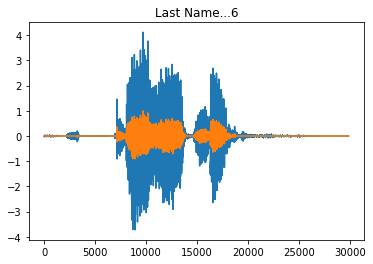

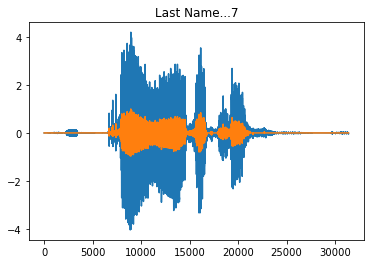

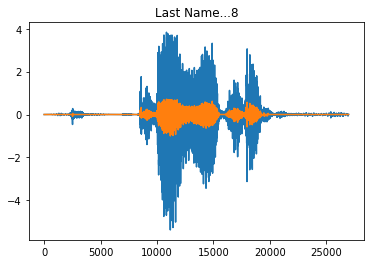

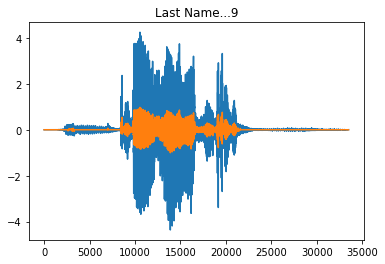

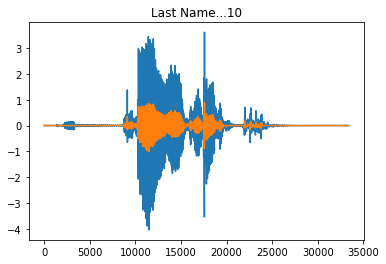

In [3]:
index = 1
for i in range(len(lastnames)):
#     temp = [data ** 2 for data in signal]
    temp = lib.util.normalize(lastnames[i])
    for n in range(0,len(temp)):
        if abs(temp[n]) < 0.05 :
            temp[n] = 0
    plt.figure(index)
    plt.title("Last Name...{}".format(index))
    plt.plot(lastnames[i])
    plt.plot(temp)
    lastnames[i] = temp
    index += 1
    

<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h2>مشاهده فایل های صوتی نام</h2><br>
</div>
<div style="direction:rtl !important; font-family: B Yekan; justify:center">
    در اینجا فایل های صوتی را بااستفاده از کتابخانه wave برای خواندن باز میکنیم و دیتا را به صورت یک ارایه نگهداری میکنیم سپس با استفاده از کتابخانه matplot آنها را نشان میدهیم. 
    تمام فایل های نام خانوادگی درون لیستی از چندین لیست به نام firstnames ذخیره میشوند.
</div>

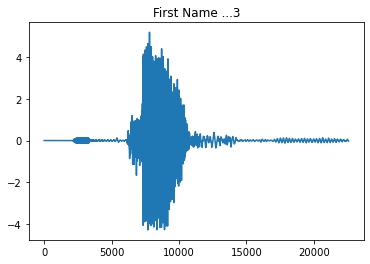

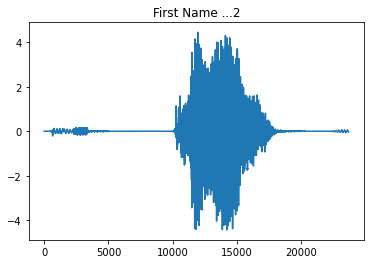

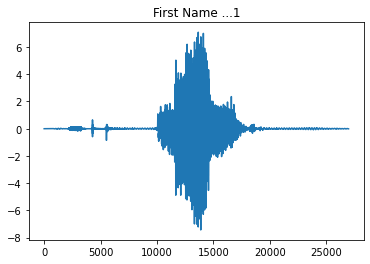

In [4]:
firstnames = []
i = 1
while i <= 3:
    spf =  wave.open("Firstname/fn ({}).wav".format(i),'rb')
    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.frombuffer(signal, 'int16')
    
    normalSignal = [round(float(data / 1000),3) for data in signal]
    firstnames.append(normalSignal)
    i += 1
i-=2
while i >= 0:
    plt.figure(i)
    plt.title("First Name ...{}".format(i + 1))
    plt.plot(firstnames[i])
    i-= 1

plt.show()

<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h2>نرمال سازی دیتاهای مربوط به نام </h2><br>
</div>
<div style="direction:rtl !important; font-family: B Yekan; justify:center">
    برای نرمال سازی از کتابخانه Librosa استفاده شده است که با سرعت بسیار بالایی داده ها را نرمال سازی میکند. در ادامه تفاوت داده های نرمال سازی شده و اولیه که از فایل صوتی خوانده شدند را مشاهده میکنید.
    <div  style="direction:rtl !important; font-family: B Yekan; font-weight:bold; color:orange">(نرمال سازی شده)</div>
    <div style="direction:rtl !important; font-family: B Yekan; font-weight:bold; color:darkblue">(داده اولیه)</div>
</div>
    

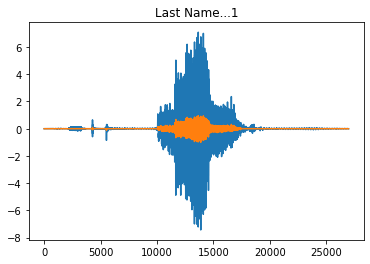

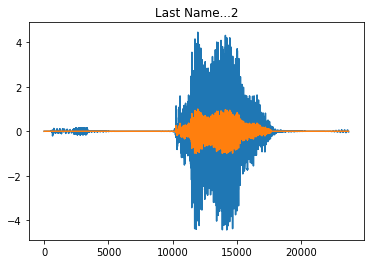

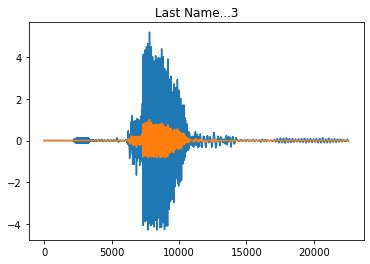

In [5]:
index = 1
for i in range(len(firstnames)):
#     temp = [data * data for data in signal]
    temp = lib.util.normalize(firstnames[i])
    for n in range(0,len(temp)):
        if abs(temp[n]) < 0.05 :
            temp[n] = 0
    plt.figure(index)
    plt.title("Last Name...{}".format(index))
    plt.plot(firstnames[i])
    plt.plot(temp)
    firstnames[i] = temp
    index += 1
    

<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h2>در اینجا فضای سکوت ابتدا و انتهایی دیتا را حذف میکنیم</h2><br>
</div>
<div style="direction:rtl !important; font-family: B Yekan; justify:center;text-align:center">
      همانطور که مشاهده میکنید متوجه میشوید که سیگنال ها در حال جابجایی هستند
    <div  style="direction:rtl !important; font-family: B Yekan; font-weight:bold; color:orange">(حذف شده)</div>
    <div style="direction:rtl !important; font-family: B Yekan; font-weight:bold; color:darkblue">(داده اولیه)</div>
</div>

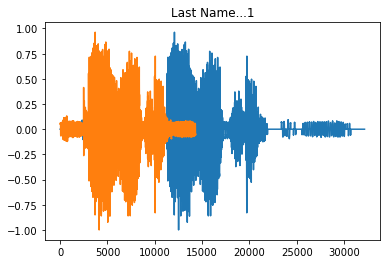

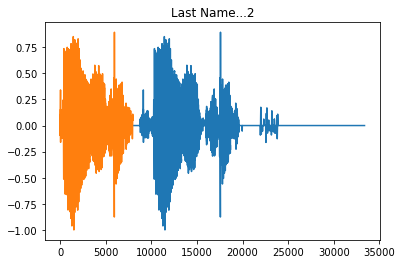

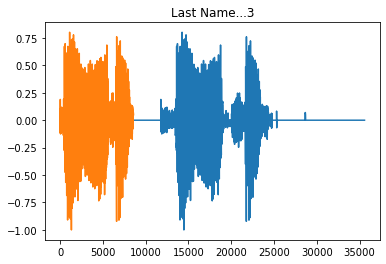

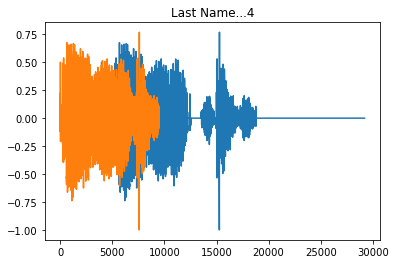

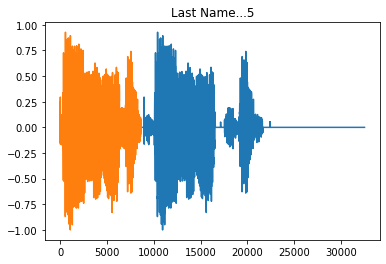

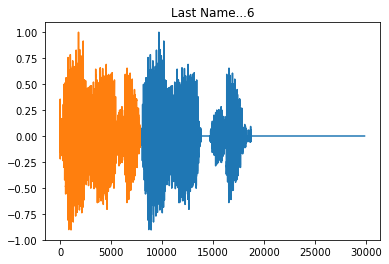

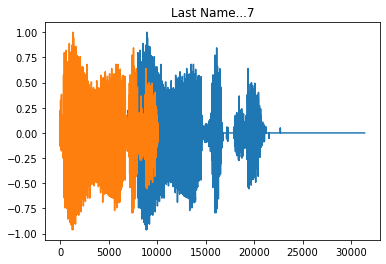

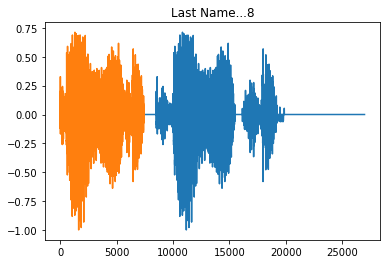

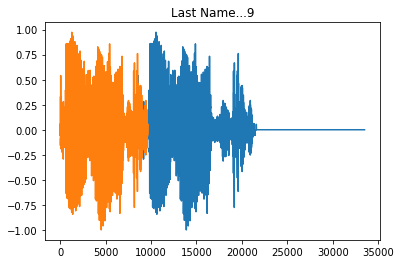

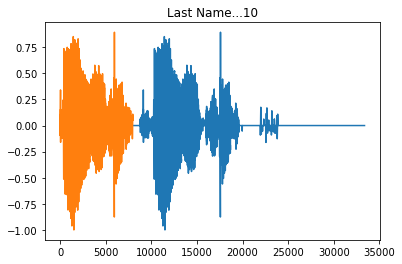

In [6]:
index = 1
for i in range(len(lastnames)):
    temp = []
    for data in lastnames[i]:
        if data != 0.0:
            temp.append(data)
    plt.figure(index)
    plt.title("Last Name...{}".format(index))
    plt.plot(lastnames[i])
    plt.plot(temp)
    index += 1

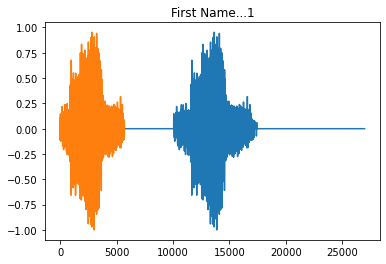

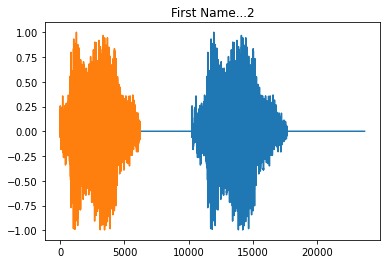

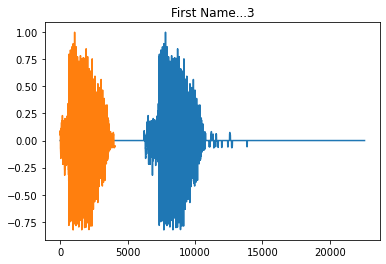

In [7]:
index = 1
for i in range(len(firstnames)):
    temp = []
    for data in firstnames[i]:
        if data != 0.0:
            temp.append(data)
    plt.figure(index)
    plt.title("First Name...{}".format(index))
    plt.plot(firstnames[i])
    plt.plot(temp)
    index += 1

<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h2>حال زمان به محاسبه ی DTW میرسد</h2><br>
</div>
<div style="direction:rtl !important; font-family: B Yekan; justify:center;text-align:center">
    در اینجا باید تفاوت هر سیگنال را با سیگنال های بعدی خوب با استفاده از روش DTW بدست بیاوریم. در اینجا از کتابخانه fastDTW استفاده شده است. در زیر محاسبه DTW برای نام خانوادگی را داریم
</div>
    


<div style="direction:rtl !important; font-family: B Yekan; justify:center;text-align:center">
در ادامه محاسبه DTW برای نام را داریم  که نتیجه در یک ماتریس (3*3) نمایش داده میشود
</div>
    

In [8]:
dtwFN = np.zeros((len(firstnames),len(firstnames)))
for first in range(len(firstnames)):
    for second in range( len(firstnames)):
        dtwFN[first][second] , dummy = fastdtw(firstnames[first], firstnames[second])

for i in range(len(dtwFN)):
    for j in range(len(dtwFN[i])):
        dtwFN[i][j] = round(dtwFN[i][j],1)
df = pd.DataFrame(dtwFN)
df

,0,1,2
0,0.0,647.8,1107.2
1,648.1,0.0,835.5
2,1107.2,836.9,0.0


<div style="direction:rtl !important; font-family: B Yekan; justify:center;text-align:center">
در اینجا تفاوت 1 با 0 باید با تفاوت 0 با 1 یکسان میشد که به دلیل وجود اعشار کمی با هم تفاوت دارند 
</div>

<div style="direction:rtl !important; font-family: B Yekan; justify:center;text-align:center">
به همین دلیل در ادامه از مقایسه های تکراری جلوگیری شده است </div>

In [9]:
dtw = np.zeros((len(lastnames),len(lastnames)))
for first in range(0,len(lastnames)):
    for second in range(first + 1, len(lastnames)):
        dtw[first][second] , dummy = fastdtw(lastnames[first], lastnames[second])


<div style="direction:rtl !important; font-family: B Yekan; justify:center;text-align:center">
برای نام خانوادگی یک ماتریس بالا مثلثی مربع با اندازه (10 * 10) در خروجی چاپ میشود
</div>
    

In [10]:
for i in range(len(dtw)):
    for j in range(len(dtw[i])):
        dtw[i][j] = round(dtw[i][j],3)
df = pd.DataFrame(dtw)
df

,0,1,2,3,4,5,6,7,8,9
0,0.0,1512.275,1527.477,1669.561,1747.309,1597.137,3580.739,1296.483,1811.118,1512.275
1,0.0,0.000,1081.334,1266.303,1383.091,1069.190,2519.881,1506.970,1468.131,0.000
2,0.0,0.000,0.000,2520.574,1286.607,2160.936,1198.068,1182.270,1259.677,1081.602
3,0.0,0.000,0.000,0.000,994.816,1444.162,1446.165,1131.401,1371.751,1266.463
4,0.0,0.000,0.000,0.000,0.000,1751.993,1206.842,1034.826,1146.427,1382.102
5,0.0,0.000,0.000,0.000,0.000,0.000,1938.650,1009.712,1609.920,1073.531
6,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1432.198,1165.177,2519.765
7,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1386.280,1510.415
8,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1463.475
9,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h2>فریم بندی</h2><br>
</div>
<div style="direction:rtl !important; font-family: B Yekan; justify:center;text-align:center">
    در اینجا برای فریم بندی تابع زیر نوشته شده است (البته با کمک از گیت هاب) که فریم بندی را بر روی یک سینگنال انجام میدهد و فریم ها را به ما برمیگرداند
</div>
    

In [11]:
 def stride_trick(a, stride_length, stride_step):
     """
     apply framing using the stride trick from numpy.

     Args:
         a (array) : signal array.
         stride_length (int) : length of the stride.
         stride_step (int) : stride step.

     Returns:
         blocked/framed array.
     """
     nrows = ((a.size - stride_length) // stride_step) + 1
     n = a.strides[0]
     return np.lib.stride_tricks.as_strided(a,
                                            shape=(nrows, stride_length),
                                            strides=(stride_step*n, n))


 def framing(sig, fs=16000, win_len=0.025, win_hop=0.01):
     """
     transform a signal into a series of overlapping frames (=Frame blocking).

     Args:
         sig     (array) : a mono audio signal (Nx1) from which to compute features.
         fs        (int) : the sampling frequency of the signal we are working with.
                           Default is 16000.
         win_len (float) : window length in sec.
                           Default is 0.025.
         win_hop (float) : step between successive windows in sec.
                           Default is 0.01.

     Returns:
         array of frames.
         frame length.

     Notes:
     ------
         Uses the stride trick to accelerate the processing.
     """
     # run checks and assertions
     if win_len < win_hop: print("ParameterError: win_len must be larger than win_hop.")

     # compute frame length and frame step (convert from seconds to samples)
     frame_length = win_len * fs
     frame_step = win_hop * fs
     signal_length = len(sig)
     frames_overlap = frame_length - frame_step

     # compute number of frames and left sample in order to pad if needed to make
     # sure all frames have equal number of samples  without truncating any samples
     # from the original signal
     rest_samples = np.abs(signal_length - frames_overlap) % np.abs(frame_length - frames_overlap)
     pad_signal = np.append(sig, np.array([0] * int(frame_step - rest_samples) * int(rest_samples != 0.)))

     # apply stride trick
     frames = stride_trick(pad_signal, int(frame_length), int(frame_step))
     return frames, frame_length

In [12]:
lastname_frames = []
firstname_frames = []
for signal in firstnames:
    temp, le = framing(signal,11025,1)
    firstname_frames.append(temp)
for signal in lastnames:
    temp, le = framing(signal,11025,1)
    lastname_frames.append(temp)

<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h2>استخراج ویژگی</h2><br>
</div>
<div style="direction:rtl !important; font-family: B Yekan; justify:center;text-align:center">
در این قسمت برای هر فریم تهیه شده از سیگنال ویژگی هایی را استخراج میکنیم و در ماتریس ویژگی سیگنال نگهداری میکنیم دوتابع دستی پیاده سازی شده اند که سرعت پایینی داشتند در انجام تست ها به همین دلیل از کتابخانه ها استفاده شده است
</div>
    

In [13]:
lastname_features = []
firstname_features = []
def get_autocorlation_coefs(frame):
    result = []
    for m in range(1,len(frame)):
        tempCount = 0
        tempSum = 0.0
        for i in range(m,len(frame)):
            if i + m < len(frame):
                tempSum += frame[i] * frame[i - m]
                tempCount += 1
        if tempCount > 0:
            result.append(tempSum)
            tempSum = 0
            tempCount = 0
    return result
def amdf(frame):
    result = []
    for m in range(1,len(frame)):
        tempCount = 0
        tempSum = 0.0
        for i in range(m,len(frame)):
            if i + m < len(frame):
                tempSum += abs(frame[i] - frame[i - m])
                tempCount += 1
        if tempCount > 0:
            result.append(tempSum)
            tempSum = 0
            tempCount = 0
    return result

In [14]:
def add_feature(features,temp):
    features.append(np.average(frame))
    features.append(np.mean(frame))
    features.append(np.min(frame))
    features.append(np.max(frame))
    return features

<div style="direction:rtl !important; font-family: B Yekan; justify:center;text-align:center">
ویژگی هایی که استخراج شده اند:</div>
<div style="direction:rtl !important; font-family: B Yekan; justify:center;text-align:center">
    Energy
</div>
<div style="direction:rtl !important; font-family: B Yekan; justify:center;text-align:center">
    ZeroCrossing
</div>
<div style="direction:rtl !important; font-family: B Yekan; justify:center;text-align:center">
    Autocorlation
</div>
<div style="direction:rtl !important; font-family: B Yekan; justify:center;text-align:center">
    AMDF
</div>
<div style="direction:rtl !important; font-family: B Yekan; justify:center;text-align:center">
    RMS
</div>

In [15]:
lastname_features = []
for signalframes in lastname_frames:
    features=[]
    for frame in signalframes:
        ff = []
        # Frame
        add_feature(ff,temp)
        # Energy
        temp = [data * data for data in frame]
        add_feature(ff,temp)
        # ZeroCrossing
        temp = np.where(np.diff(np.sign(frame)))[0]
        add_feature(ff,temp)
        # Autocorlation 
        # implement that we have here has O(n^2) and not particularly a fast one 😞
        # features.append(get_autocorlation_coefs(frame))
        temp = np.correlate(frame, frame, mode="full")
        add_feature(ff,temp)
        # MFCC
        temp = lib.feature.mfcc(frame,11025)
        add_feature(ff,temp)
        # AMDF
        # implement that we have here has O(n^2) and not particularly a fast one 😞
        #temp = amdf(frame)
        lpccs = lpcc(sig=frame, fs=11025, num_ceps=10, lifter=0, normalize=True)
        add_feature(ff,lpccs)
        # RMS
        temp = lib.feature.rms(frame,11025)
        add_feature(ff,temp)
        features.append(ff)
    lastname_features.append(features)

In [16]:
firstname_features = []
for signalframes in firstname_frames:
    features=[]
    for frame in signalframes:
        ff = []
        # Frame
        add_feature(ff,temp)
        # Energy
        temp = [data * data for data in frame]
        add_feature(ff,temp)
        # ZeroCrossing
        temp = np.where(np.diff(np.sign(frame)))[0]
        add_feature(ff,temp)
        # Autocorlation 
        # implement that we have here has O(n^2) and not particularly a fast one 😞
        # features.append(get_autocorlation_coefs(frame))
        temp = np.correlate(frame, frame, mode="full")
        add_feature(ff,temp)
        # MFCC
        temp = lib.feature.mfcc(frame,11025)
        add_feature(ff,temp)
        # AMDF
        # implement that we have here has O(n^2) and not particularly a fast one 😞
        #temp = amdf(frame)
        lpccs = lpcc(sig=frame, fs=11025, num_ceps=10, lifter=0, normalize=True)
        add_feature(ff,lpccs)
        # RMS
        temp = lib.feature.rms(frame,11025)
        add_feature(ff,temp)
        features.append(ff)
    firstname_features.append(features)

<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h2>  ویژگی ها را داریم حال باید DTW را بر روی ویژگی ها نیز انجام دهیم</h2><br>
</div>
    

In [17]:
feature_DTW_lastname = np.zeros((len(lastnames),len(lastnames)))
for first in range(len(lastname_features)):
    for second in range(first + 1, len(lastname_features)):
        feature_DTW_lastname[first][second] , dummy = fastdtw(lastname_features[first], lastname_features[second])

In [18]:
for i in range(len(feature_DTW_lastname)):
    for j in range(len(feature_DTW_lastname[i])):
        feature_DTW_lastname[i][j] = round(feature_DTW_lastname[i][j],3)
df = pd.DataFrame(feature_DTW_lastname)
df

,0,1,2,3,4,5,6,7,8,9
0,0.0,203.217,251.511,306.098,169.903,294.377,240.079,363.378,134.670,203.217
1,0.0,0.000,393.977,225.339,225.907,376.677,368.519,456.357,223.504,0.000
2,0.0,0.000,0.000,299.103,462.192,690.629,623.222,454.132,469.885,393.977
3,0.0,0.000,0.000,0.000,386.650,475.211,479.400,251.374,342.783,225.339
4,0.0,0.000,0.000,0.000,0.000,213.863,219.268,308.766,123.453,225.907
5,0.0,0.000,0.000,0.000,0.000,0.000,188.647,385.892,229.238,376.677
6,0.0,0.000,0.000,0.000,0.000,0.000,0.000,342.280,260.649,368.519
7,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,441.707,456.357
8,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,223.504
9,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [19]:
feature_DTW_firstname = np.zeros((len(firstnames),len(firstnames)))
for first in range(len(firstname_features)):
    for second in range(first + 1, len(firstname_features)):
        feature_DTW_firstname[first][second] , dummy = fastdtw(firstname_features[first], firstname_features[second])

In [20]:
for i in range(len(feature_DTW_firstname)):
    for j in range(len(feature_DTW_firstname[i])):
        feature_DTW_firstname[i][j] = round(feature_DTW_firstname[i][j],3)

df = pd.DataFrame(feature_DTW_firstname)
df

,0,1,2
0,0.0,210.756,308.775
1,0.0,0.000,383.533
2,0.0,0.000,0.000


<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h2> مقاسه بین استفاده از ویژگی ها و استفاده نکردن از ویژگی ها</h2><br>
</div>

In [21]:
print("```````````````````````````````````LastName DTW Without Feature")
df = pd.DataFrame(dtw)
df


```````````````````````````````````LastName DTW Without Feature


,0,1,2,3,4,5,6,7,8,9
0,0.0,1512.275,1527.477,1669.561,1747.309,1597.137,3580.739,1296.483,1811.118,1512.275
1,0.0,0.000,1081.334,1266.303,1383.091,1069.190,2519.881,1506.970,1468.131,0.000
2,0.0,0.000,0.000,2520.574,1286.607,2160.936,1198.068,1182.270,1259.677,1081.602
3,0.0,0.000,0.000,0.000,994.816,1444.162,1446.165,1131.401,1371.751,1266.463
4,0.0,0.000,0.000,0.000,0.000,1751.993,1206.842,1034.826,1146.427,1382.102
5,0.0,0.000,0.000,0.000,0.000,0.000,1938.650,1009.712,1609.920,1073.531
6,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1432.198,1165.177,2519.765
7,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1386.280,1510.415
8,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1463.475
9,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [22]:
print("```````````````````````````````````LastName DTW With Feature")

df = pd.DataFrame(feature_DTW_lastname)
df

```````````````````````````````````LastName DTW With Feature


,0,1,2,3,4,5,6,7,8,9
0,0.0,203.217,251.511,306.098,169.903,294.377,240.079,363.378,134.670,203.217
1,0.0,0.000,393.977,225.339,225.907,376.677,368.519,456.357,223.504,0.000
2,0.0,0.000,0.000,299.103,462.192,690.629,623.222,454.132,469.885,393.977
3,0.0,0.000,0.000,0.000,386.650,475.211,479.400,251.374,342.783,225.339
4,0.0,0.000,0.000,0.000,0.000,213.863,219.268,308.766,123.453,225.907
5,0.0,0.000,0.000,0.000,0.000,0.000,188.647,385.892,229.238,376.677
6,0.0,0.000,0.000,0.000,0.000,0.000,0.000,342.280,260.649,368.519
7,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,441.707,456.357
8,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,223.504
9,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [23]:
print("```````````````````````````````````````````FirstName DTW Without Feature")

df = pd.DataFrame(dtwFN)
df


```````````````````````````````````````````FirstName DTW Without Feature


,0,1,2
0,0.0,647.8,1107.2
1,648.1,0.0,835.5
2,1107.2,836.9,0.0


In [24]:
print("```````````````````````````````````````````FirstName DTW With Feature")
df = pd.DataFrame(feature_DTW_firstname)
df

```````````````````````````````````````````FirstName DTW With Feature


,0,1,2
0,0.0,210.756,308.775
1,0.0,0.000,383.533
2,0.0,0.000,0.000


<div style="direction:rtl !important; font-family: B Yekan; text-align:center">
    همانطور که مشاهده میشود میتوان گفت که دیتاهایی که محاسبات بر روی انها انجام میشود بسیار کوچکتر شده اند و بنابراین حافظه و زمان کمتری مصرف میشود.
</div>
<div style="direction:rtl !important; font-family: B Yekan; text-align:center">
همچنین محاسبه ی DTW بر روی ماتریس ویژگی سریع تر از حالت اول بود اما درعوض زمان استخراج ویژگی ها به محاسبات اضافه میشود که ممکن است کوتاه نباشد.
</div>

<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h1>قسمت اختیاری تمرین</h1><br>
</div>

<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    در این قسمت تمرین صداهای ضبط شده توسط خانوم ضبط شده اند که تفاوت هایی نسبت به موارد قبلی دارند 
</div>

<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h3>مشاهده فایل صوتی نام خانوادگی</h3><br>
</div>

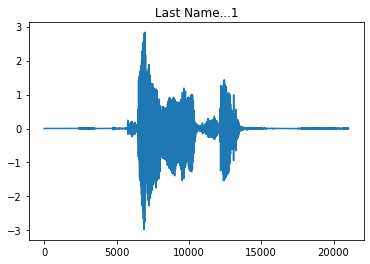

In [25]:
lastnames_sec = []
i = 1
while i <= 1:
    spf =  wave.open("LastnameSec/lnSec ({}).wav".format(i),'rb')
    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.frombuffer(signal, dtype = "int16")
    normalSignal = [float(data / 10000) for data in signal]
    lastnames_sec.append(normalSignal)
    i += 1
i-=2
while i >= 0:
    plt.figure(i)
    plt.title("Last Name...{}".format(i + 1))
    plt.plot(lastnames_sec[i])
    i-= 1

plt.show()

<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h3>نرمال سازی فایل صوتی نام خانوادگی</h3><br>
</div>

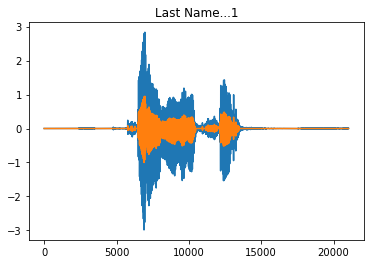

In [26]:
index = 1
for i in range(len(lastnames_sec)):
#     temp = [data ** 2 for data in signal]
    temp = lib.util.normalize(lastnames_sec[i])
    for n in range(0,len(temp)):
        if abs(temp[n]) < 0.05 :
            temp[n] = 0
    plt.figure(index)
    plt.title("Last Name...{}".format(index))
    plt.plot(lastnames_sec[i])
    plt.plot(temp)
    lastnames_sec[i] = temp
    index += 1

<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h3>حذف سکوت</h3><br>
</div>

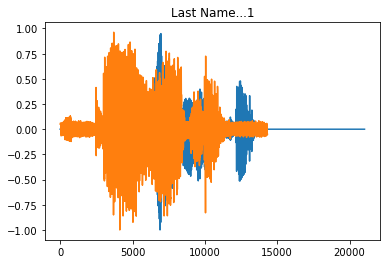

In [27]:
index = 1
for i in range(len(lastnames_sec)):
    temp = []
    for data in lastnames[i]:
        if data != 0.0:
            temp.append(data)
    plt.figure(index)
    plt.title("Last Name...{}".format(index))
    plt.plot(lastnames_sec[i])
    plt.plot(temp)
    index += 1

<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h3>محاسبه ی فاصله بین نام خانوادگی اول و دوم</h3><br>
</div>

In [28]:
dtw_sec = np.zeros((len(lastnames_sec),len(lastnames)))
for first in range(len(lastnames_sec)):
    for second in range(len(lastnames)):
        dtw_sec[first][second] , dummy = fastdtw(lastnames_sec[first], lastnames[second])


<div style="direction:rtl !important; font-family: B Yekan; justify:center;text-align:center">
 یک ماتریس مربع با اندازه (10 * 1) در خروجی چاپ میشود
</div>
    

In [29]:
for i in range(len(dtw_sec)):
    for j in range(len(dtw_sec[i])):
        dtw_sec[i][j] = round(dtw_sec[i][j],3)
df = pd.DataFrame(dtw_sec)
df

,0,1,2,3,4,5,6,7,8,9
0,1835.943,1015.48,1227.866,989.605,1078.754,1282.048,1652.597,947.492,1681.517,1015.48


<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h3>فریم بندی </h3><br>
</div>

In [31]:
lastname_sec_frames = []
for signal in lastnames_sec:
    temp, le = framing(signal,11025,1)
    lastname_sec_frames.append(temp)

<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h3>استخراج ویژگی </h3><br>
</div>

In [32]:
lastname_sec_features = []
for signalframes in lastname_sec_frames:
    features=[]
    for frame in signalframes:
        ff = []
        # Frame
        add_feature(ff,temp)
        # Energy
        temp = [data * data for data in frame]
        add_feature(ff,temp)
        # ZeroCrossing
        temp = np.where(np.diff(np.sign(frame)))[0]
        add_feature(ff,temp)
        # Autocorlation 
        # implement that we have here has O(n^2) and not particularly a fast one 😞
        # features.append(get_autocorlation_coefs(frame))
        temp = np.correlate(frame, frame, mode="full")
        add_feature(ff,temp)
        # MFCC
        temp = lib.feature.mfcc(frame,11025)
        add_feature(ff,temp)
        # AMDF
        # implement that we have here has O(n^2) and not particularly a fast one 😞
        #temp = amdf(frame)
        lpccs = lpcc(sig=frame, fs=11025, num_ceps=10, lifter=0, normalize=True)
        add_feature(ff,lpccs)
        # RMS
        temp = lib.feature.rms(frame,11025)
        add_feature(ff,temp)
        features.append(ff)
    lastname_sec_features.append(features)

<div style="direction:rtl !important; font-family: B Yekan; font-weight:bold;text-align:center">
    <h3>محاسبه DTW با ماتریس های ویژگی</h3><br>
</div>

In [33]:
feature_DTW_lastname_sec = np.zeros((len(lastnames_sec),len(lastnames)))
for first in range(len(lastname_sec_features)):
    for second in range(len(lastname_features)):
        feature_DTW_lastname_sec[first][second] , dummy = fastdtw(lastname_sec_features[first], lastname_features[second])

In [34]:

df = pd.DataFrame(feature_DTW_lastname_sec)
df

,0,1,2,3,4,5,6,7,8,9
0,191.730932,277.595126,579.359864,370.779837,198.532984,219.51226,201.052889,226.52814,246.525883,277.595126
